### **Prédiction des Scores d'Examen des Étudiants**

## 1. Introduction et Objectif
## 2. Importation des Bibliothèques
## 3. Chargement des Données
## 4. Analyse Exploratoire des Données (EDA)
## 5. Nettoyage et Préparation des Données
## 6. Feature Engineering
## 7. Normalisation des Données
## 8. Séparation Train/Test
## 9. Modélisation
## 10. Optimisation (Tuning de Lasso)
## 11. Evaluation et Comparaison
## 12. Conclusion

# **1. Introduction et Objectif**

*Objectif :* Prédire le score d'examen (exam_score) des étudiants en utilisant différents modèles de régression.

*Dataset :* 5000 étudiants avec 20 variables explicatives (heures d'étude, sommeil, santé mentale, etc.)

*Modèles testés :*
- Régression Linéaire Multiple
- Régression Polynomiale
- Régression Lasso

# **2. Importation des Bibliothèques**

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


# **3. Chargement des Données**

In [2]:
# Chargement du dataset
df = pd.read_csv('ultimate_student_productivity_dataset_5000.csv')
print("Dataset chargé avec succès")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

Dataset chargé avec succès
Nombre de lignes : 5000
Nombre de colonnes : 21


# **4. Analyse Exploratoire des Données (EDA)**

4.1 Aperçu des premières lignes

In [3]:
# Aperçu des premières lignes
print("Aperçu des données")
display(df.head())

print("\n Informations sur les colonnes")
df.info()

Aperçu des données


,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81



 Informations sur les colonnes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   academic_level        5000 non-null   object 
 4   study_hours           5000 non-null   float64
 5   self_study_hours      5000 non-null   float64
 6   online_classes_hours  5000 non-null   float64
 7   social_media_hours    5000 non-null   float64
 8   gaming_hours          5000 non-null   float64
 9   sleep_hours           5000 non-null   float64
 10  screen_time_hours     5000 non-null   float64
 11  exercise_minutes      5000 non-null   int64  
 12  caffeine_intake_mg    5000 non-null   int64  
 13  part_time_job         5000 non-null   int64  
 14  upcoming_deadline     5000 non-null   in

4.2 Statistiques descriptives des variables numériques

In [4]:
# Statistiques descriptives des variables numériques
print("=== Statistiques Descriptives ===")
df.describe()

=== Statistiques Descriptives ===


,student_id,age,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,screen_time_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.520400,4.539594,2.478734,2.011984,2.998086,1.564514,7.016492,6.979588,74.535600,251.450400,0.498200,0.501400,5.507400,29.431616,45.615324,37.267716,18.803752
std,1443.520003,2.870406,1.821665,1.177990,0.983906,1.467949,1.110807,1.163692,2.486214,42.932293,143.842712,0.500047,0.500048,2.869145,9.962902,14.246591,16.849397,12.130840
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1250.750000,18.000000,3.250000,1.660000,1.320000,1.990000,0.670000,6.237500,5.280000,37.000000,129.000000,0.000000,0.000000,3.000000,22.567500,35.727500,25.290000,9.337500
50%,2500.500000,20.000000,4.530000,2.480000,2.010000,2.980000,1.490000,7.010000,6.950000,75.000000,252.000000,0.000000,1.000000,5.000000,29.430000,45.690000,36.860000,18.010000
75%,3750.250000,23.000000,5.760000,3.290000,2.690000,4.030000,2.340000,7.810000,8.710000,112.000000,376.000000,1.000000,1.000000,8.000000,36.242500,55.352500,49.142500,27.400000
max,5000.000000,25.000000,11.840000,7.410000,6.000000,8.280000,5.640000,10.000000,15.300000,149.000000,499.000000,1.000000,1.000000,10.000000,63.480000,97.580000,98.020000,64.090000


4.3 Vérification des valeurs manquantes

In [5]:
# Vérification des valeurs manquantes
print("=== Valeurs Manquantes ===")
missing = df.isnull().sum()
print(missing[missing > 0])

if missing.sum() == 0:
    print("Aucune valeur manquante détectée !")
else:
    print(f"\nTotal de valeurs manquantes : {missing.sum()}")

=== Valeurs Manquantes ===
Series([], dtype: int64)
Aucune valeur manquante détectée !


4.4.1 Distribution de la variable cible


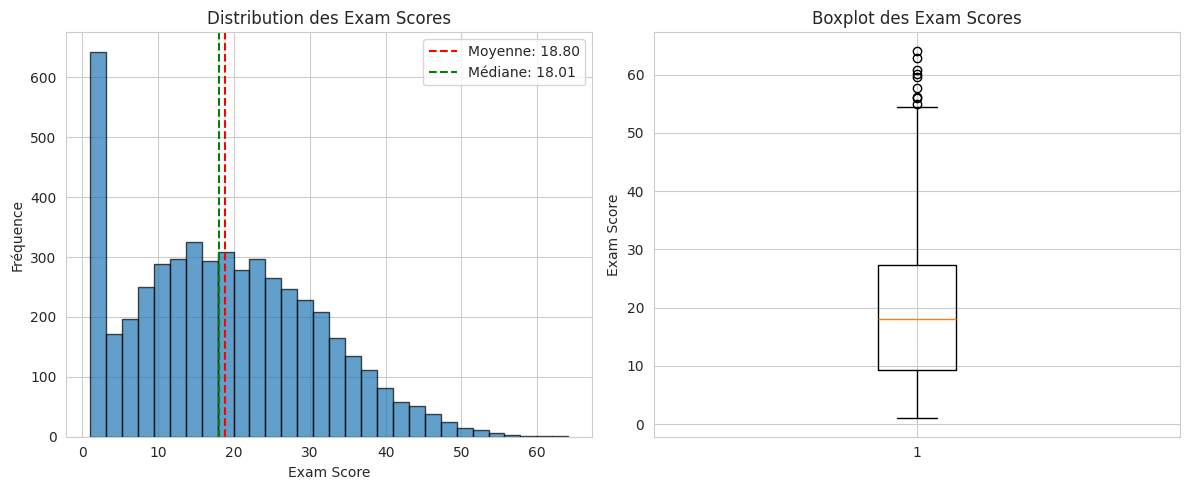

In [6]:
# Distribution de exam_score
plt.figure(figsize=(12, 5))

# Histogramme
plt.subplot(1, 2, 1)
plt.hist(df['exam_score'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Exam Score')
plt.ylabel('Fréquence')
plt.title('Distribution des Exam Scores')
plt.axvline(df['exam_score'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["exam_score"].mean():.2f}')
plt.axvline(df['exam_score'].median(), color='green', linestyle='--', label=f'Médiane: {df["exam_score"].median():.2f}')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['exam_score'])
plt.ylabel('Exam Score')
plt.title('Boxplot des Exam Scores')

plt.tight_layout()
plt.show()

4.4.2 Détection d'outliers sur toutes les variables

In [7]:
# Vérifier les valeurs min/max pour détecter des anomalies
print("=== Vérification des valeurs min/max ===\n")

variables_to_check = ['age', 'study_hours', 'self_study_hours', 'sleep_hours',
                      'social_media_hours', 'gaming_hours', 'screen_time_hours',
                      'exercise_minutes', 'caffeine_intake_mg']

for col in variables_to_check:
    print(f"{col:25} | Min: {df[col].min():8.2f} | Max: {df[col].max():8.2f}")

=== Vérification des valeurs min/max ===

age                       | Min:    16.00 | Max:    25.00
study_hours               | Min:     0.00 | Max:    11.84
self_study_hours          | Min:     0.00 | Max:     7.41
sleep_hours               | Min:     4.00 | Max:    10.00
social_media_hours        | Min:     0.00 | Max:     8.28
gaming_hours              | Min:     0.00 | Max:     5.64
screen_time_hours         | Min:     1.00 | Max:    15.30
exercise_minutes          | Min:     0.00 | Max:   149.00
caffeine_intake_mg        | Min:     0.00 | Max:   499.00


4.5 Matrice de corrélation

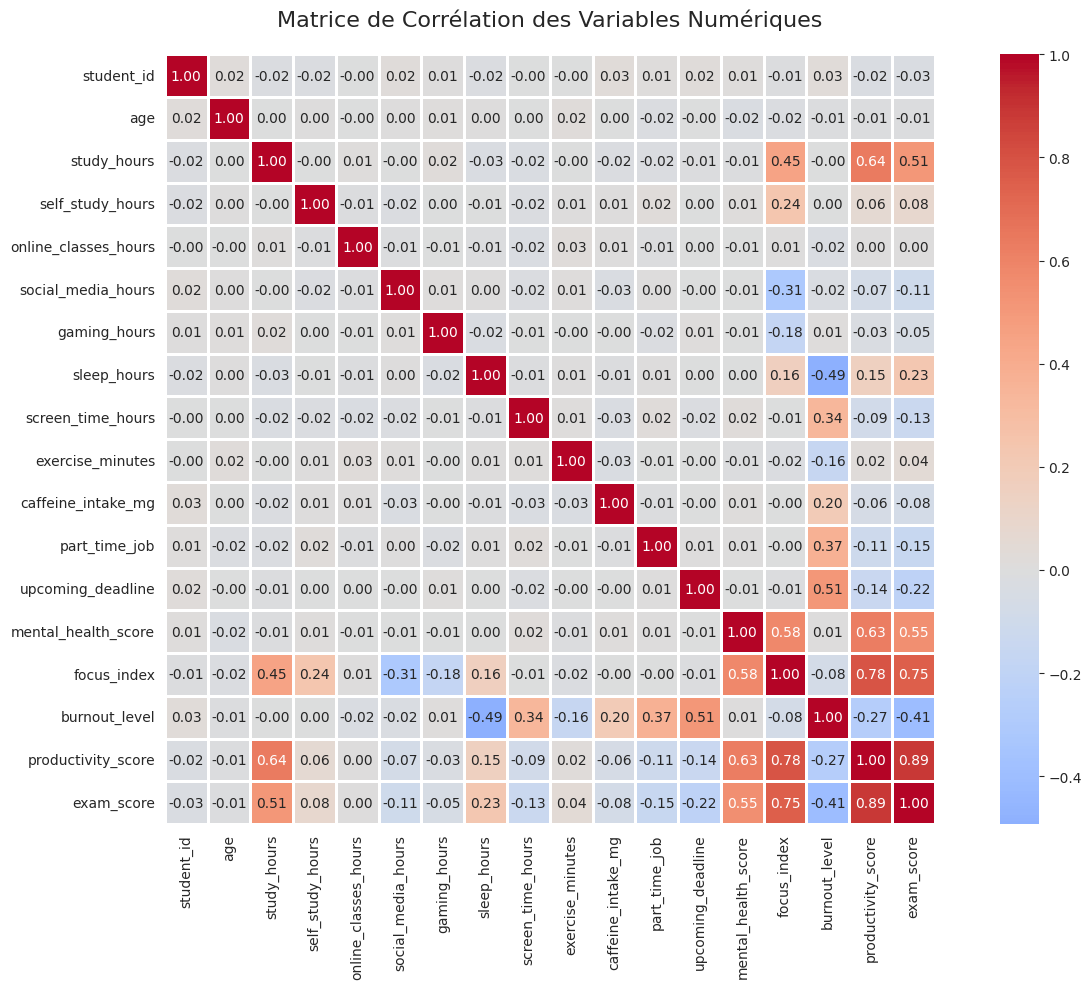


=== Corrélation avec exam_score (triée) ===
exam_score              1.000000
productivity_score      0.886401
focus_index             0.749879
mental_health_score     0.546547
study_hours             0.513434
sleep_hours             0.234710
self_study_hours        0.083602
exercise_minutes        0.040724
online_classes_hours    0.004975
age                    -0.009047
student_id             -0.029406
gaming_hours           -0.054506
caffeine_intake_mg     -0.075586
social_media_hours     -0.106116
screen_time_hours      -0.131940
part_time_job          -0.149807
upcoming_deadline      -0.215342
burnout_level          -0.407808
Name: exam_score, dtype: float64


In [8]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculer la matrice de corrélation
correlation_matrix = df[numeric_cols].corr()

# Visualisation avec heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Corrélation avec exam_score
print("\n=== Corrélation avec exam_score (triée) ===")
exam_corr = correlation_matrix['exam_score'].sort_values(ascending=False)
print(exam_corr)

# **5. Nettoyage et Préparation des Données**

In [9]:
# Afficher les colonnes actuelles
print("Colonnes avant nettoyage:")
print(df.columns.tolist())
print(f"\nNombre de colonnes : {df.shape[1]}")

# Supprimer student_id (identifiant inutile pour la prédiction)
df_clean = df.drop(columns=['student_id'])

print("\n" + "="*50)
print("Colonnes après nettoyage:")
print(df_clean.columns.tolist())
print(f"\nNombre de colonnes : {df_clean.shape[1]}")
print("\nstudent_id supprimé avec succès")

Colonnes avant nettoyage:
['student_id', 'age', 'gender', 'academic_level', 'study_hours', 'self_study_hours', 'online_classes_hours', 'social_media_hours', 'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes', 'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline', 'internet_quality', 'mental_health_score', 'focus_index', 'burnout_level', 'productivity_score', 'exam_score']

Nombre de colonnes : 21

Colonnes après nettoyage:
['age', 'gender', 'academic_level', 'study_hours', 'self_study_hours', 'online_classes_hours', 'social_media_hours', 'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes', 'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline', 'internet_quality', 'mental_health_score', 'focus_index', 'burnout_level', 'productivity_score', 'exam_score']

Nombre de colonnes : 20

student_id supprimé avec succès


# **6. Feature Engineering**

Nous allons encoder les variables catégorielles (gender, academic_level, internet_quality) en variables numériques via One-Hot Encoding.

6.1. Identifier les variables catégorielles

In [10]:
# Identifier les variables catégorielles
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("=== Variables Catégorielles ===")
print(categorical_cols)

# Afficher les valeurs uniques pour chaque variable catégorielle
print("\n=== Valeurs uniques ===")
for col in categorical_cols:
    print(f"{col}: {df_clean[col].unique()}")

=== Variables Catégorielles ===
['gender', 'academic_level', 'internet_quality']

=== Valeurs uniques ===
gender: ['Other' 'Male' 'Female']
academic_level: ['High School' 'Undergraduate' 'Postgraduate']
internet_quality: ['Good' 'Poor' 'Average']


6.2. Appliquer le One-Hot Encoding

In [11]:
# Appliquer One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=['gender', 'academic_level', 'internet_quality'], dtype=int)

print("=== Avant encodage ===")
print(f"Nombre de colonnes : {df_clean.shape[1]}")

print("\n=== Après encodage ===")
print(f"Nombre de colonnes : {df_encoded.shape[1]}")

print("\n=== Nouvelles colonnes créées ===")
# Afficher les colonnes encodées
encoded_cols = [col for col in df_encoded.columns if col not in df_clean.columns or col in categorical_cols]
print(encoded_cols)

print("\n One-Hot Encoding appliqué avec succès !")

=== Avant encodage ===
Nombre de colonnes : 20

=== Après encodage ===
Nombre de colonnes : 26

=== Nouvelles colonnes créées ===
['gender_Female', 'gender_Male', 'gender_Other', 'academic_level_High School', 'academic_level_Postgraduate', 'academic_level_Undergraduate', 'internet_quality_Average', 'internet_quality_Good', 'internet_quality_Poor']

 One-Hot Encoding appliqué avec succès !


# **7. Normalisation des Données**

7.1. Séparer X et y AVANT la normalisation

Important : On sépare d'abord X et y, puis on normalise seulement X (pas y !).

In [12]:
# Séparer les features (X) et la target (y)
X = df_encoded.drop(columns=['exam_score'])
y = df_encoded['exam_score']

print("=== Séparation X et y ===")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nNombre de features: {X.shape[1]}")

=== Séparation X et y ===
X shape: (5000, 25)
y shape: (5000,)

Nombre de features: 25


7.2. Normaliser X avec StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler

# Créer le scaler
scaler = StandardScaler()

# Normaliser X
X_scaled = scaler.fit_transform(X)

# Convertir en DataFrame pour garder les noms de colonnes
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("=== Normalisation effectuée ===")
print(f"Shape de X_scaled: {X_scaled.shape}")
print("\n=== Aperçu des données normalisées ===")
print(X_scaled.head())

print("\n=== Statistiques avant normalisation ===")
print(X[['age', 'study_hours', 'caffeine_intake_mg']].describe())

print("\n=== Statistiques après normalisation ===")
print(X_scaled[['age', 'study_hours', 'caffeine_intake_mg']].describe())

print("\n Normalisation complétée !")

=== Normalisation effectuée ===
Shape de X_scaled: (5000, 25)

=== Aperçu des données normalisées ===
        age  study_hours  self_study_hours  online_classes_hours  \
0 -0.878152     1.702133         -0.779995              0.191111   
1 -0.878152    -1.278955         -0.219662              0.089465   
2  0.515519    -0.598191         -2.104417             -1.750326   
3 -1.226569     0.664517         -0.338521              1.014442   
4 -0.529734     1.257440         -0.644157              1.339709   

   social_media_hours  gaming_hours  sleep_hours  screen_time_hours  \
0            0.035369      0.563148    -0.426695          -0.204986   
1           -0.918439      0.887269    -0.899376          -0.373934   
2           -1.129639      0.464111     1.180420           0.257611   
3           -0.496038      0.572151    -0.607173           1.886757   
4           -0.237148     -0.778353     0.853840           1.223031   

   exercise_minutes  caffeine_intake_mg  ...  productivity_sco

# **8. Séparation Train/Test**
Nous divisons les données en ensemble d'entraînement (80%) et de test (20%) pour évaluer la performance du modèle sur des données non vues.

In [14]:
from sklearn.model_selection import train_test_split

# Séparation Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("=== Séparation Train/Test ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\n Données séparées avec succès !")
print(f"  - Entraînement : {X_train.shape[0]} étudiants (80%)")
print(f"  - Test : {X_test.shape[0]} étudiants (20%)")

=== Séparation Train/Test ===
X_train shape: (4000, 25)
X_test shape: (1000, 25)
y_train shape: (4000,)
y_test shape: (1000,)

 Données séparées avec succès !
  - Entraînement : 4000 étudiants (80%)
  - Test : 1000 étudiants (20%)


# **9. Modélisation**
Nous allons tester 3 modèles de régression et comparer leurs performances :
1. Régression Linéaire Multiple
2. Régression Polynomiale (degré 2)
3. Régression Lasso (régularisation L1)

9.1 Régression Linéaire Multiple

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Créer et entraîner le modèle
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prédictions
y_pred_lr = model_lr.predict(X_test)

# Calcul des métriques
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("="*60)
print("RÉGRESSION LINÉAIRE MULTIPLE")
print("="*60)
print(f"R² Score:  {r2_lr:.4f}")
print(f"MAE:       {mae_lr:.4f}")
print(f"MSE:       {mse_lr:.4f}")
print(f"RMSE:      {rmse_lr:.4f}")
print("="*60)

RÉGRESSION LINÉAIRE MULTIPLE
R² Score:  0.8164
MAE:       3.9633
MSE:       25.0184
RMSE:      5.0018


9.2 Régression Polynomiale (degré 2)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Créer les features polynomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Features avant : {X_train.shape[1]}")
print(f"Features après polynôme : {X_train_poly.shape[1]}")

# Créer et entraîner le modèle
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Prédictions
y_pred_poly = model_poly.predict(X_test_poly)

# Calcul des métriques
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("\n" + "="*60)
print("         RÉGRESSION POLYNOMIALE (degré 2)")
print("="*60)
print(f"R² Score:  {r2_poly:.4f}")
print(f"MAE:       {mae_poly:.4f}")
print(f"MSE:       {mse_poly:.4f}")
print(f"RMSE:      {rmse_poly:.4f}")
print("="*60)

Features avant : 25
Features après polynôme : 350

         RÉGRESSION POLYNOMIALE (degré 2)
R² Score:  0.8131
MAE:       4.0423
MSE:       25.4727
RMSE:      5.0470


9.3 Régression Lasso (régularisation L1)

In [17]:
from sklearn.linear_model import Lasso

# Créer et entraîner le modèle Lasso sur les features polynomiales
model_lasso = Lasso(alpha=1.0, random_state=42)
model_lasso.fit(X_train_poly, y_train)

# Prédictions
y_pred_lasso = model_lasso.predict(X_test_poly)

# Calcul des métriques
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Compter les features non-nulles
coefficients_non_nuls = np.sum(model_lasso.coef_ != 0)

print("="*60)
print("         RÉGRESSION LASSO (alpha=1.0)")
print("="*60)
print(f"R² Score:  {r2_lasso:.4f}")
print(f"MAE:       {mae_lasso:.4f}")
print(f"MSE:       {mse_lasso:.4f}")
print(f"RMSE:      {rmse_lasso:.4f}")
print(f"\nFeatures gardées: {coefficients_non_nuls} / {X_train_poly.shape[1]}")
print("="*60)

         RÉGRESSION LASSO (alpha=1.0)
R² Score:  0.8078
MAE:       4.0801
MSE:       26.1898
RMSE:      5.1176

Features gardées: 4 / 350


# **10. Optimisation (Tuning de Lasso)**

 **Optimisation des Hyperparamètres**

Testons différentes valeurs d'alpha pour Lasso afin de trouver le meilleur compromis.

In [18]:
# Tester différentes valeurs d'alpha
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
results = []

print("=== Test de différentes valeurs d'alpha ===\n")

for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    n_features = np.sum(model.coef_ != 0)

    results.append({
        'alpha': alpha,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
        'Features': n_features
    })

    print(f"Alpha={alpha:6.3f} | R²={r2:.4f} | MAE={mae:.4f} | RMSE={rmse:.4f} | Features={n_features}")

# Trouver le meilleur alpha
best_result = max(results, key=lambda x: x['R²'])
print("\n" + "="*60)
print(f" Meilleur alpha: {best_result['alpha']}")
print(f"   R² Score: {best_result['R²']:.4f}")
print(f"   Features gardées: {best_result['Features']} / 350")
print("="*60)

=== Test de différentes valeurs d'alpha ===

Alpha= 0.001 | R²=0.8136 | MAE=4.0337 | RMSE=5.0391 | Features=258
Alpha= 0.010 | R²=0.8174 | MAE=3.9803 | RMSE=4.9879 | Features=217
Alpha= 0.100 | R²=0.8226 | MAE=3.9072 | RMSE=4.9169 | Features=46
Alpha= 0.500 | R²=0.8186 | MAE=3.9505 | RMSE=4.9711 | Features=5
Alpha= 1.000 | R²=0.8078 | MAE=4.0801 | RMSE=5.1176 | Features=4
Alpha= 2.000 | R²=0.7684 | MAE=4.5034 | RMSE=5.6171 | Features=3
Alpha= 5.000 | R²=0.6105 | MAE=6.0064 | RMSE=7.2852 | Features=1

 Meilleur alpha: 0.1
   R² Score: 0.8226
   Features gardées: 46 / 350


# **11. Evaluation et Comparaison**

Créons un graphique comparatif final !

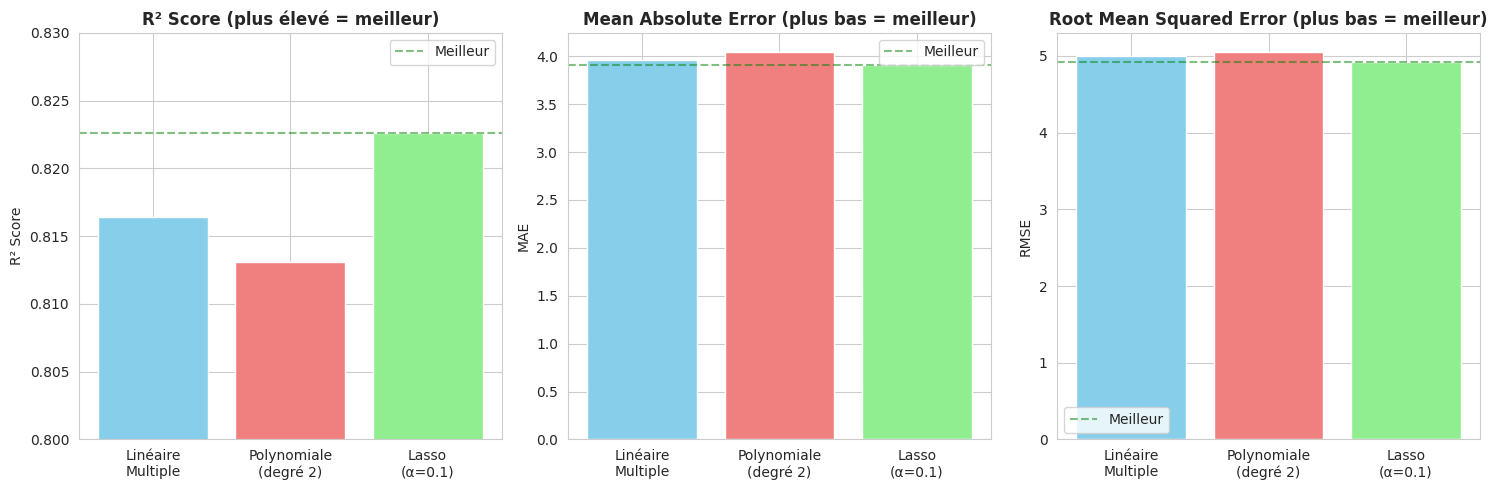


                    TABLEAU RÉCAPITULATIF DES MODÈLES
                Modèle       R²      MAE     RMSE
    Linéaire\nMultiple 0.816392 3.963319 5.001840
Polynomiale\n(degré 2) 0.813058 4.042290 5.047049
        Lasso\n(α=0.1) 0.822575 3.907159 4.916906

 MODÈLE GAGNANT: Lasso (alpha=0.1)
   • Meilleur R²: 0.8226
   • Features utilisées: 46/350 (réduit l'overfitting)


In [19]:
# Créer le dataframe de comparaison
comparison_df = pd.DataFrame({
    'Modèle': ['Linéaire\nMultiple', 'Polynomiale\n(degré 2)', f'Lasso\n(α={best_result["alpha"]})'],
    'R²': [r2_lr, r2_poly, best_result['R²']],
    'MAE': [mae_lr, mae_poly, best_result['MAE']],
    'RMSE': [rmse_lr, rmse_poly, best_result['RMSE']]
})

# Visualisation comparative
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Score
axes[0].bar(comparison_df['Modèle'], comparison_df['R²'], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score (plus élevé = meilleur)', fontweight='bold')
axes[0].set_ylim(0.80, 0.83)
axes[0].axhline(y=comparison_df['R²'].max(), color='green', linestyle='--', alpha=0.5, label='Meilleur')
axes[0].legend()

# MAE
axes[1].bar(comparison_df['Modèle'], comparison_df['MAE'], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_ylabel('MAE')
axes[1].set_title('Mean Absolute Error (plus bas = meilleur)', fontweight='bold')
axes[1].axhline(y=comparison_df['MAE'].min(), color='green', linestyle='--', alpha=0.5, label='Meilleur')
axes[1].legend()

# RMSE
axes[2].bar(comparison_df['Modèle'], comparison_df['RMSE'], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[2].set_ylabel('RMSE')
axes[2].set_title('Root Mean Squared Error (plus bas = meilleur)', fontweight='bold')
axes[2].axhline(y=comparison_df['RMSE'].min(), color='green', linestyle='--', alpha=0.5, label='Meilleur')
axes[2].legend()

plt.tight_layout()
plt.show()

# Tableau récapitulatif
print("\n" + "="*80)
print("                    TABLEAU RÉCAPITULATIF DES MODÈLES")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)
print(f"\n MODÈLE GAGNANT: Lasso (alpha={best_result['alpha']})")
print(f"   • Meilleur R²: {best_result['R²']:.4f}")
print(f"   • Features utilisées: {best_result['Features']}/350 (réduit l'overfitting)")
print("="*80)

# **12. Conclusion**

### Résumé du Projet

Nous avons prédit les scores d'examen de 5000 étudiants en utilisant 25 variables (heures d'étude, santé mentale, sommeil, etc.).

### Étapes Réalisées


1.  *EDA complète* : Analyse de distribution, corrélations, outliers
2.  *Nettoyage* : Suppression de student_id
3.  *Feature Engineering* : One-Hot Encoding des variables catégorielles
4.  *Normalisation* : StandardScaler pour mettre les features à la même échelle
5.  *Modélisation* : Test de 3 modèles différents
6.  *Optimisation* : Tuning de l'hyperparamètre alpha pour Lasso

### Résultats

*Modèle Gagnant : Régression Lasso (alpha=0.1)*

- *R² = 0.8226* → Le modèle explique 82.26% de la variance des scores
- *MAE = 3.91* → Erreur moyenne de ±3.91 points
- *RMSE = 4.92* → Peu de grosses erreurs
- *46 features* sur 350 → Sélection intelligente, évite l'overfitting

### Variables les Plus Importantes (d'après l'EDA)

1. *productivity_score* (0.89) - Impact majeur
2. *focus_index* (0.75) - Très important
3. *mental_health_score* (0.55) - Important
4. *study_hours* (0.51) - Important
5. *burnout_level* (-0.41) - Impact négatif fort

### Recommandations

Pour améliorer les scores d'examen, les étudiants devraient :
-  Améliorer leur *productivité* et *concentration*
-  Prendre soin de leur *santé mentale*
-  Étudier régulièrement
-  Éviter le *burnout*
-  Bien *dormir* (corrélation positive de 0.23)
-  Réduire les *réseaux sociaux* (corrélation négative)





## **Projet réalisé avec succès !**